In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import hog

In [3]:
def color_hist(image, nbins=32, bins_range=(0, 256)):
    
    # Computing the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256)) #R-Channel
    ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))# G-Channel
    bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))#B-Channel
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenating the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    
    # Returning the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

R-G-B For Imagetest_images\test1.jpg


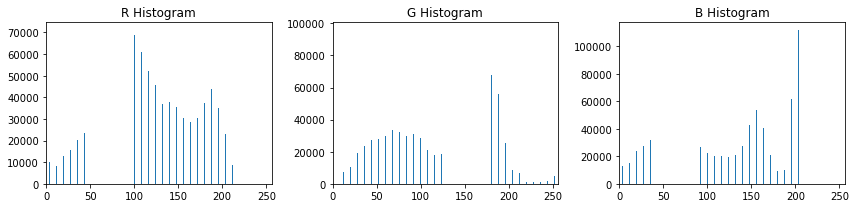

R-G-B For Imagetest_images\test2.jpg


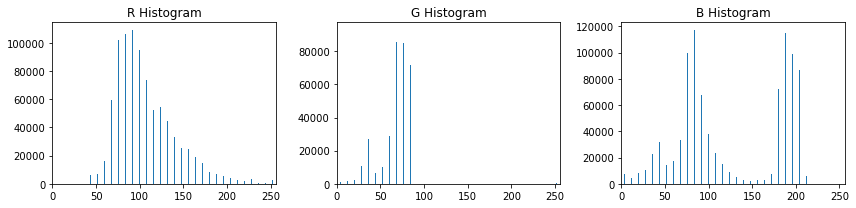

R-G-B For Imagetest_images\test3.jpg


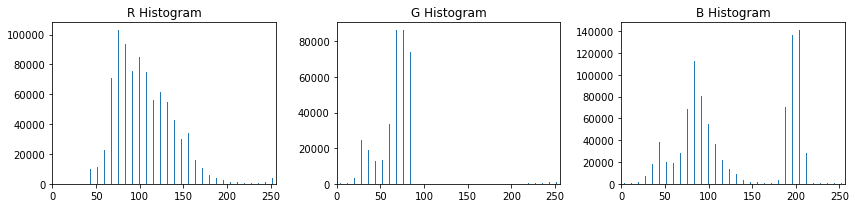

R-G-B For Imagetest_images\test4.jpg


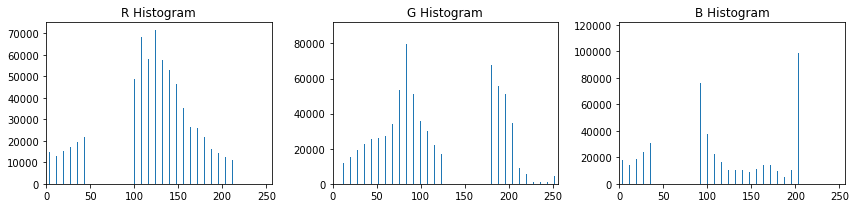

R-G-B For Imagetest_images\test5.jpg


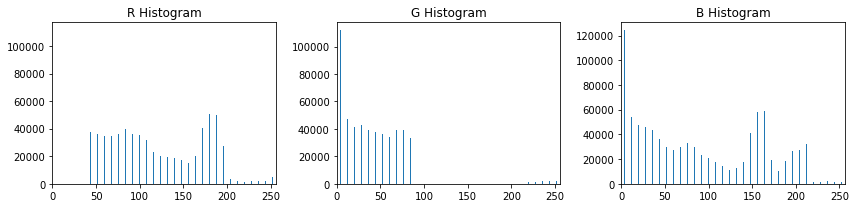

R-G-B For Imagetest_images\test6.jpg


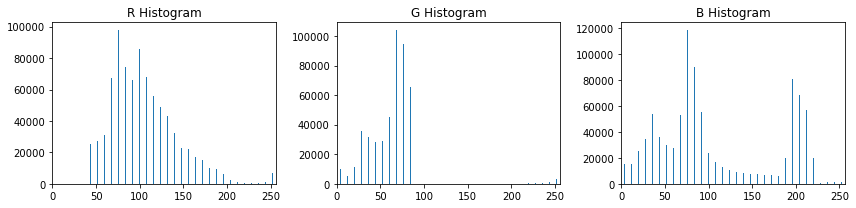

In [4]:
for image in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image)
    rhist, ghist, bhist, bin_centers, hist_features = color_hist(img, nbins=32, bins_range=(0, 256))
    if rhist is not None:
        print("R-G-B For Image"+ image)
        fig = plt.figure(figsize=(12,3))
        plt.subplot(131)
        plt.bar(bin_centers, rhist[0])
        plt.xlim(0, 256)
        plt.title('R Histogram')
        plt.subplot(132)
        plt.bar(bin_centers, ghist[0])
        plt.xlim(0, 256)
        plt.title('G Histogram')
        plt.subplot(133)
        plt.bar(bin_centers, bhist[0])
        plt.xlim(0, 256)
        plt.title('B Histogram')
        fig.tight_layout()
        plt.show()
    else:
        print('Your function is returning None for at least one variable...')

In [5]:
#Function For Color Space Exploration
def plot3d(pixels, colors_rgb,axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plotting pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    axis = Axes3D(fig)

    # Set axis limits
    axis.set_xlim(*axis_limits[0])
    axis.set_ylim(*axis_limits[1])
    axis.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    axis.tick_params(axis='both', which='major', labelsize=14, pad=8)
    axis.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    axis.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    axis.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    axis.scatter(pixels[:, :, 0].ravel(),pixels[:, :, 1].ravel(),pixels[:, :, 2].ravel(), c=colors_rgb.reshape((-1, 3))
                 , edgecolors='none')

    return axis  # returning Axes3D object for further manipulation

Color Space Exploration image for=test_images\test1.jpg
Color Space Exploration For RGB


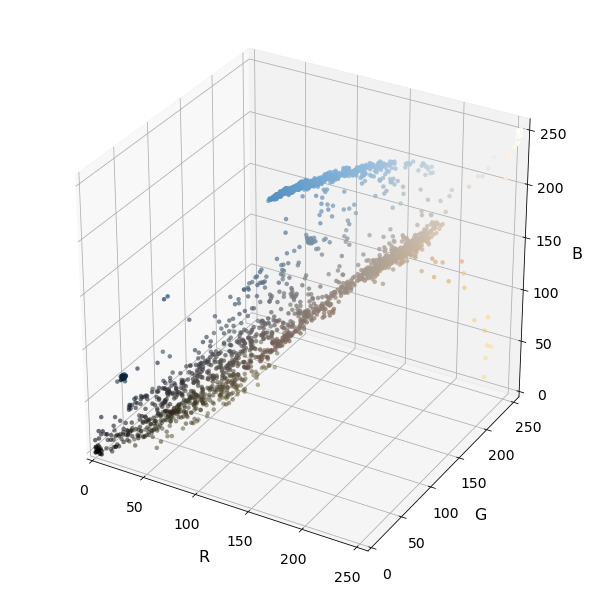

Color Space Exploration For HSV


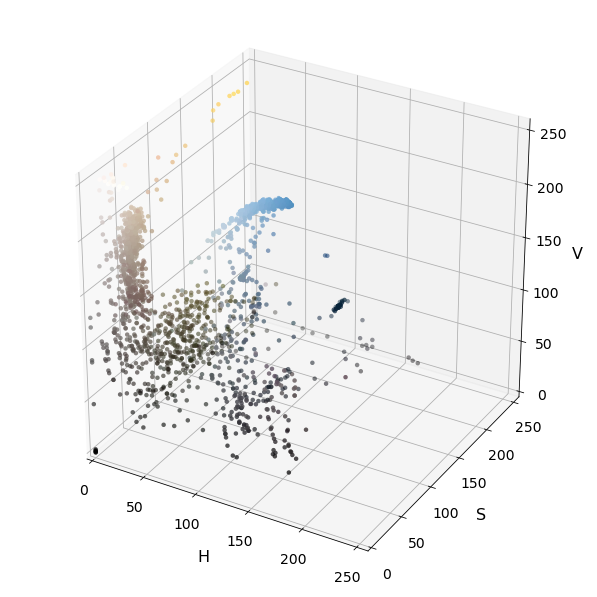

Color Space Exploration image for=test_images\test2.jpg
Color Space Exploration For RGB


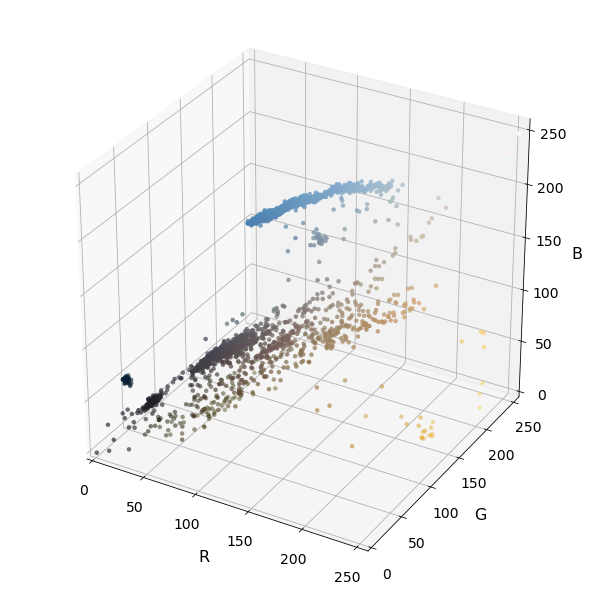

Color Space Exploration For HSV


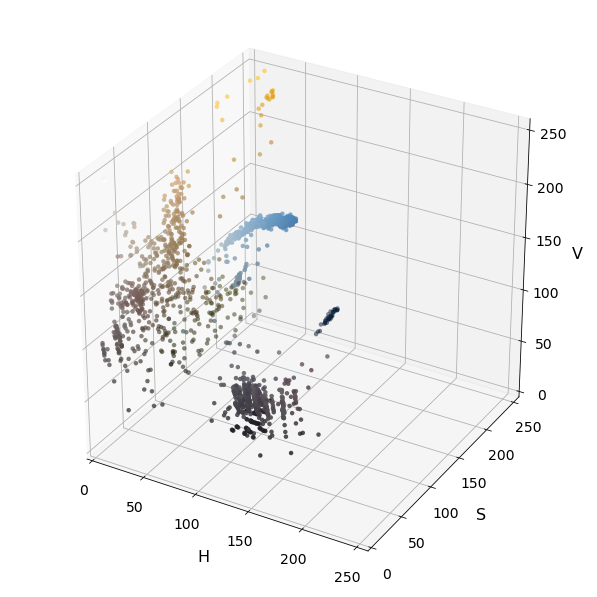

Color Space Exploration image for=test_images\test3.jpg
Color Space Exploration For RGB


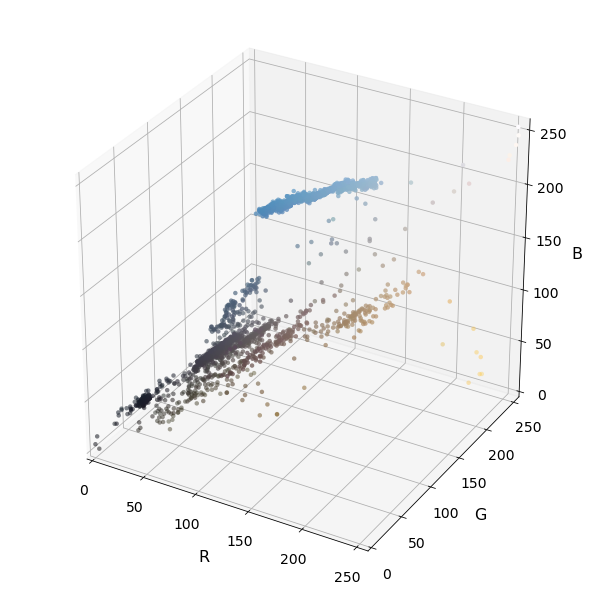

Color Space Exploration For HSV


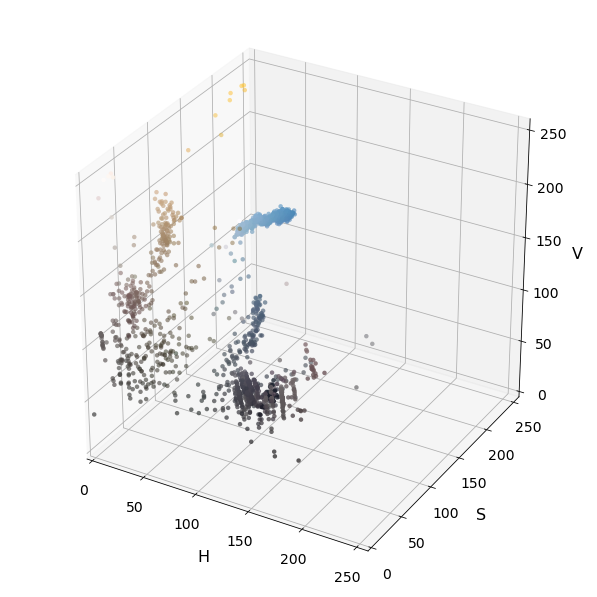

Color Space Exploration image for=test_images\test4.jpg
Color Space Exploration For RGB


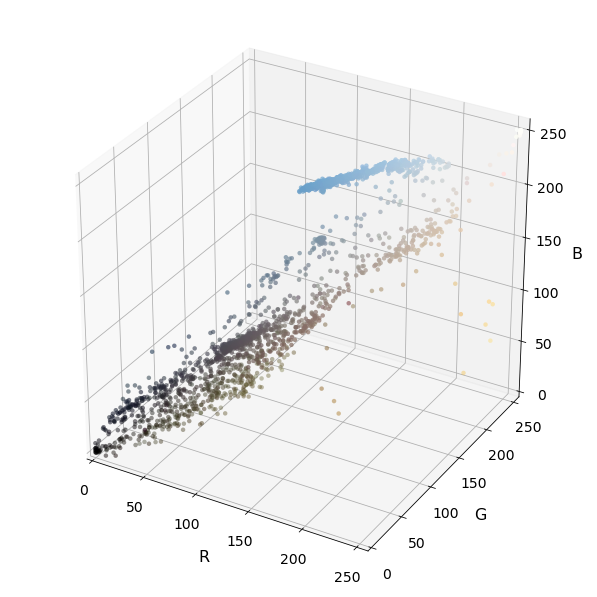

Color Space Exploration For HSV


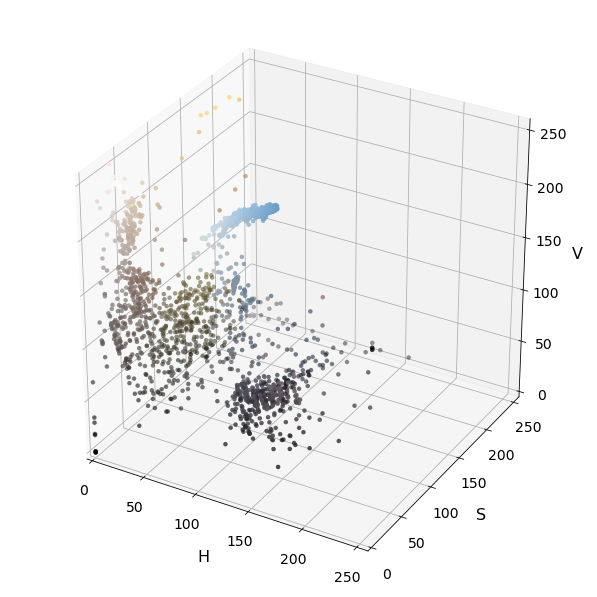

Color Space Exploration image for=test_images\test5.jpg
Color Space Exploration For RGB


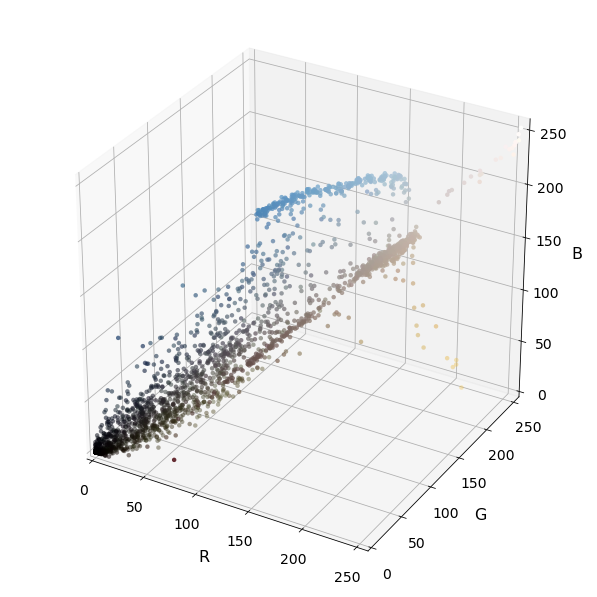

Color Space Exploration For HSV


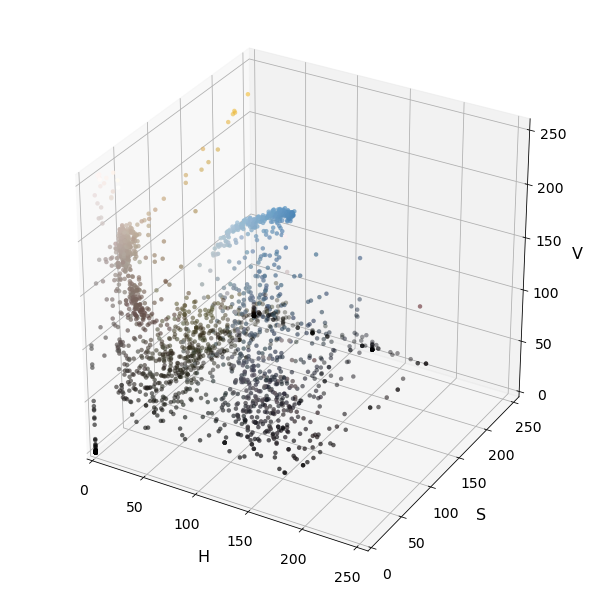

Color Space Exploration image for=test_images\test6.jpg
Color Space Exploration For RGB


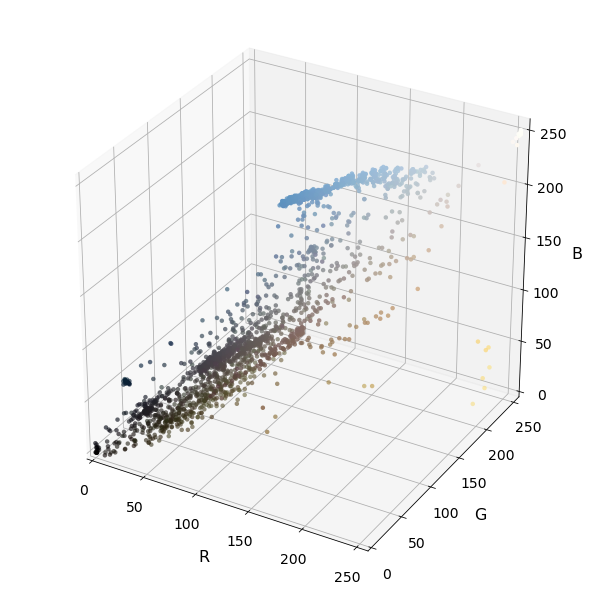

Color Space Exploration For HSV


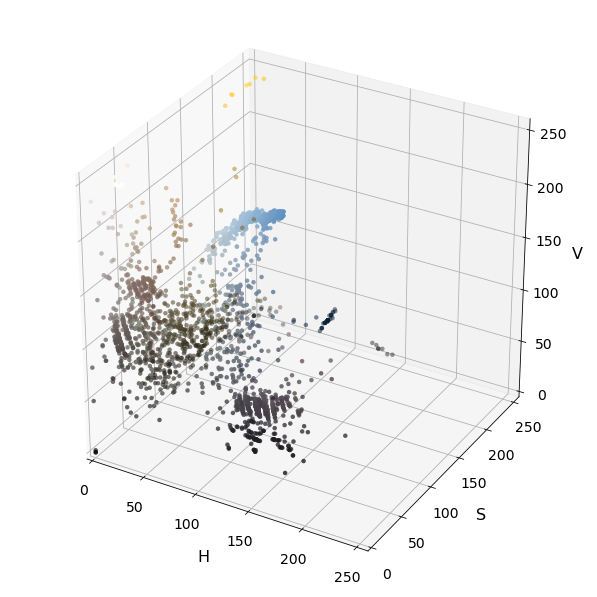

In [7]:
for image in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image)
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_RGB2HSV)
    img_small_rgb = img_small / 255.  # scaled to [0, 1], only for plotting

    plt.figure(figsize=(5,5))
    # Plot and show
    print("Color Space Exploration image for="+image)
    plot3d(img_small, img_small_rgb)
    print("Color Space Exploration For RGB")
    plt.show()
    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    print("Color Space Exploration For HSV")
    plt.show()


In [8]:
# Function for Performing  spatial binning 
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    small_img = cv2.resize(img, size)
    features = small_img.ravel() # Remove this line!
    # Return the feature vector
    return features

Image Location=test_images\test1.jpg


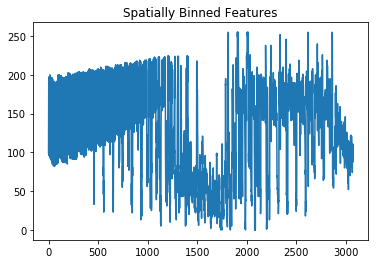

Image Location=test_images\test2.jpg


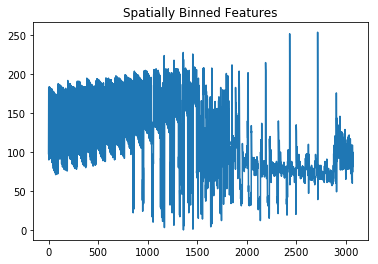

Image Location=test_images\test3.jpg


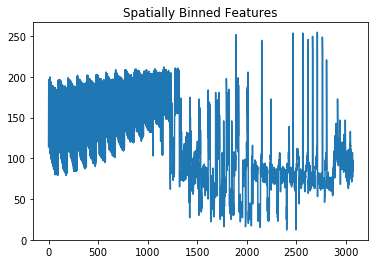

Image Location=test_images\test4.jpg


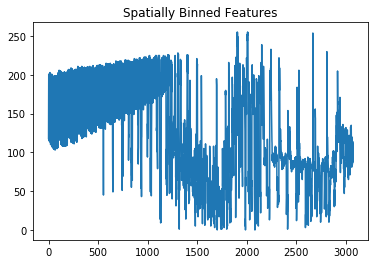

Image Location=test_images\test5.jpg


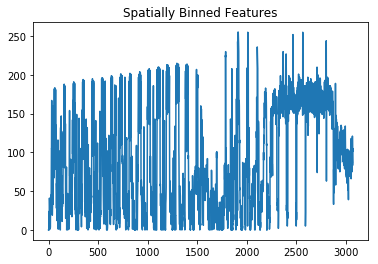

Image Location=test_images\test6.jpg


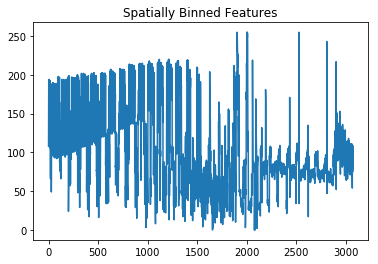

In [9]:
for image in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image)
    feature_vectors = bin_spatial(img, color_space='RGB', size=(32, 32))

    # Plot features
    print("Image Location="+image)
    plt.plot(feature_vectors)
    plt.title('Spatially Binned Features')
    plt.show()

In [10]:
def data_look(car_list, notcar_list):
    data_dict = {}
    # Defining a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcars)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

Your function returned a count of 1196  cars and 1125  non-cars
of size:  (64, 64, 3)  and data type: uint8


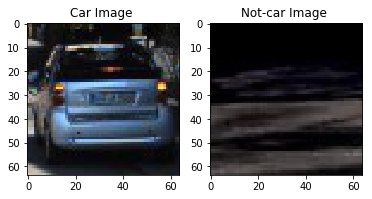

In [11]:
# Udacity data set collection

notcars = []
cars = []
for image in glob.glob('dataset/vehicles_smallset/cars**/*.jpeg', recursive=True):
    cars.append(image)

for image in glob.glob('dataset/non-vehicles_smallset/notcars**/*.jpeg', recursive=True):
    notcars.append(image)
    

data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

# Random plotting of data

car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Reading in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


plt.subplot(1,2,1)
plt.imshow(car_image)
plt.title('Car Image ')
plt.subplot(1,2,2)
plt.imshow(notcar_image)
plt.title('Not-car Image ')
plt.show()
    

In [18]:
def get_hog_features(img,cspace, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    hog_channel=0
    if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(img)
    
    if hog_channel<3:
        img = feature_image[:,:,hog_channel]
    else:
        img = np.copy(feature_image)
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        from skimage.feature import hog
        
        features, hog_image = hog(img, orientations=orient,
            pixels_per_cell=(pix_per_cell, pix_per_cell), 
            cells_per_block=(cell_per_block, cell_per_block),
            visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = [] # Remove this line
        return features

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


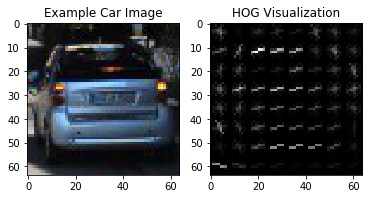

In [19]:

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(car_image,'RGB', orient,pix_per_cell, cell_per_block,vis=True, feature_vec=False)
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()


In [ ]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [26]:
def plot_channel(image, cspace ='RBG'):
    if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(image)
    
    fig = plt.figure(figsize=(20,10))
    print('Image Channel='+cspace)
    plt.subplot(3,1,1)
    plt.imshow(feature_image[:,:,0])
    plt.title('0 Part of the image')
    plt.subplot(3,1,2)
    plt.imshow(feature_image[:,:,1])
    plt.title('1 part of the image')
    plt.subplot(3,1,3)
    plt.imshow(feature_image[:,:,2])
    plt.title('2 part of the image')
    plt.show()

Image Channel=LUV


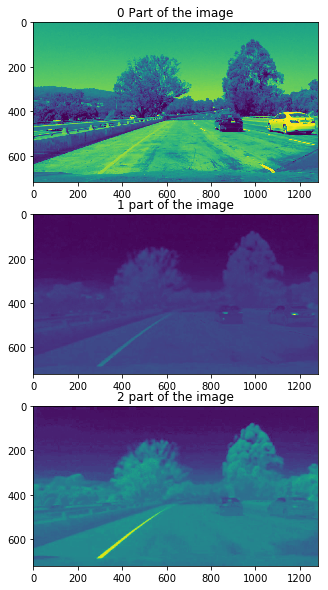

Image Channel=LUV


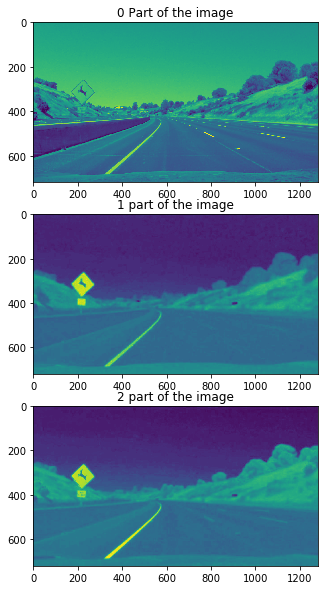

Image Channel=LUV


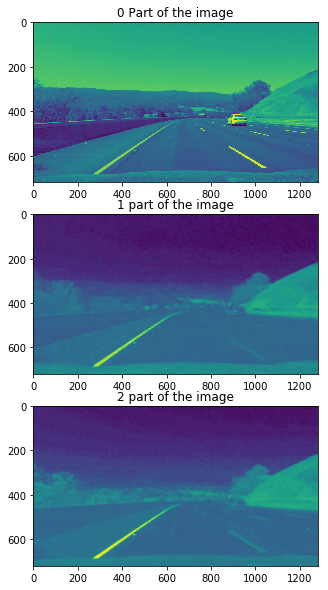

Image Channel=LUV


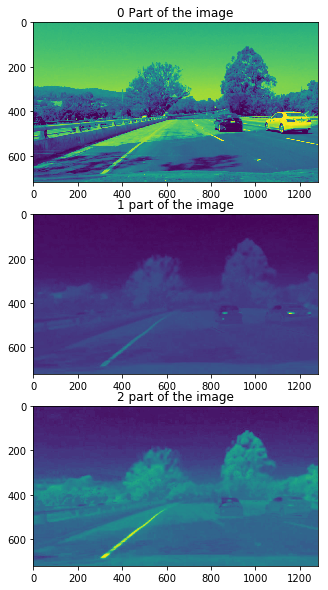

Image Channel=LUV


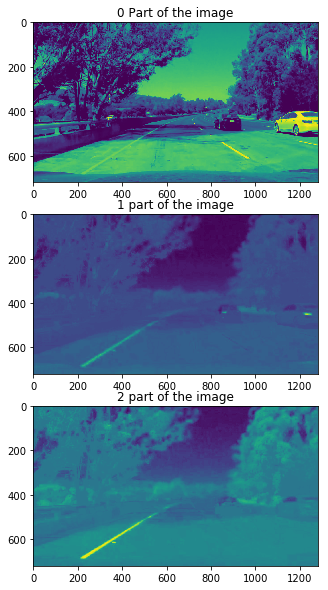

Image Channel=LUV


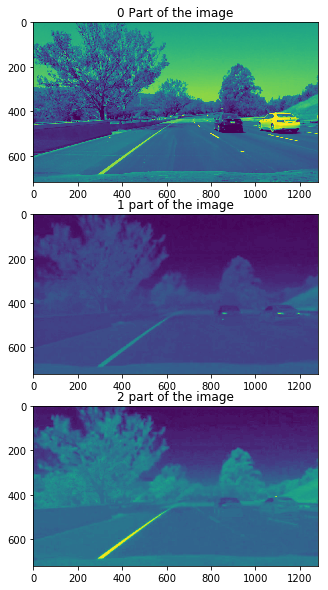

In [30]:
for image in glob.glob('test_images/test*.jpg'):
    img = mpimg.imread(image)
    plot_channel(img,'LUV')